# Course Notes Machine Learning with Tree-Based Models in Python - Datacamp  
### Notes by César Muro  
**Classification tree**  
* Sequence of if-else questions about individual features.
* Objective: infer class labels
* Able to capture non-linear relationships between features and labels
* Don't requiere scaling  
  




## Classification tree in sklearn    
from sklearn.tree import DecisionTreeClassifier  
%Import train_test_split  
from sklearn.model_selection import train_test_split   
%import accuracy_score  
from sklearn.metrics import accuracy score  
%Split the dataset  
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,stratigy=y,random_state=1)  
  
 % Initiate dt  
 dt=DecisionTreeClassifier(max_depth=2,random_state=1)  
 dt.fit(X_train,y_train)    
 y_pred=dt.predict(X_test)  
 accuracy_score(y_test,y_pred)  

**Decision region**: region in the feature space where all instances are assigned to one class label.  
**Decision boundary:**  surgace separating different decision regions.  

Work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [1]:
import numpy as np
import pandas as pd
wbc=pd.read_csv("wbc.csv")
mpg=pd.read_csv("auto.csv")
indian=pd.read_csv("indian_liver_patient_preprocessed.csv")
bikes=pd.read_csv("bikes.csv")
print(wbc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We define our set/array X with the features

In [19]:
X=wbc[['radius_mean','concave points_mean']].values

In [20]:
wbc.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We generate a new column with numerical values of the diagnosis column: 1 if diagnosis is 'M', and 0 if diagnosis is 'B'.  

In [21]:
wbc['diagnosis_count']=np.where(wbc['diagnosis']=='M',1,0)

And define the predicted array y

In [24]:
y=wbc.diagnosis_count.values

We split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [27]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
SEED=1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


Evaluate the classification tree

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set

In [31]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Test accuracy: {:.2f}".format(acc))

Test accuracy: 0.89


Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

### Classification tree learning  
**Building blocks of a decision tree**    
* **Decision-Tree**: data structure consisting of a hierarchy of nodes.
* **Node**: question or prediction.  

Three kind of nodes:  
* **Root**: no parent node, question giving rise to two children.  
* **Internal node:** one parent node, question giving rise to two children nodes. 
* **Leaf**: one parent node, no children nodes --> prediction. In each leaf, one class-label is predominant.    
   

* Maximizing information gain after each split. Information gain:  
$$ IG(f,sp)=I(parent)-\left( \frac{N_{left}}{N}I(left)+\frac{N_{right}}{N}I(right)  \right)  $$ 
  
Criteria to measure the impurity of a node $I(node)$  
* gni index, 
* entropy
  
**Classification tree learning**  
* Nodes are grown recursively
* At each node, split the data based on
   * feature f and split point sp to maximize IG
   * If IG=0, declare the node a leaf
  
In the function:  DesicionClassifierTree(criterion='gini', random_state=1)  

Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wbc=pd.read_csv("wbc.csv")
wbc=wbc.drop('Unnamed: 32',axis=1)
X=wbc.drop(['diagnosis','id'],axis=1).values
wbc['diagnosis_count']=np.where(wbc['diagnosis']=='M',1,0)
y=wbc['diagnosis_count'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [27]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=1)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

Entropy vs Gini index

Compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

In [31]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_pred, y_test)

In [33]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.930
Accuracy achieved by using the gini index: 0.930


Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Decision tree for regression  
Recall that in regression the target variable is continuous. The output is a real value.  
You can perform non-linear regression models!  
  
%Import DecisionTreeRegressor  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error as mse  
...  
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)

Train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

Split the data set to 80% train and 20% test. 

In [35]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [38]:
from sklearn.model_selection import train_test_split
X=mpg.drop(['mpg','origin'],axis=1).values
y=mpg.mpg.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [43]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

Evaluate the regression tree

Evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [44]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


Linear regression vs regression tree

Compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predlr=lr.predict(X_test)
mse=MSE(y_predlr,y_test)
rmse_lr=mse**(1/2)
# Print rmse_dt
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.93
Regression Tree test set RMSE: 4.27


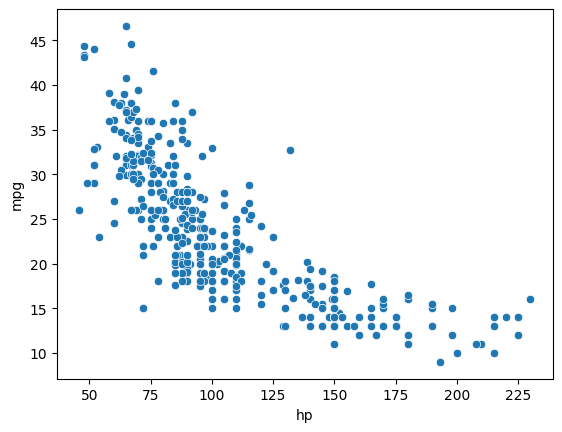

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=mpg.hp,y=mpg.mpg)
plt.show()

## The Bias-Variance tradeoff  
**Generalization error**  
In supervise learning:
* Find model $\hat{f}$ that best approximates $f:\hat{f} \sim f$  
* \hat{f} can be Logistic Regression, Decision Tree, Neural Network
* Discard noise as much as possible  
* End goal: $\hat{f}$ should have achieve a low predictive error on unseen datasets. 

**Difficulties in approximating $f$**  
* Overfitting: $\hat{f}(x)$ fits the training set noise.
* Underfitting: $\hat{f}$ is not flexible enough to approximate $f$.  
  
**Generalization error of $\hat{f}$**  
$$\hat{f}=bias^{2}+variance+irreducible \quad error$$  
* **Bias**: error term that tells you, on average, how much $\hat{f}\neq f$. Underfitting. Low model complexity.  
* **Variance:** tells you how much $\hat{f}$ is inconsisten over different training sets.  Overfitting. High model complexity.  
* **Model complexity**: sets the flexibility of $\hat{f}$. The goal is to find the model complexity that achieves the lowest generalization error.  
* **Bias-variance tradeoff**: Balance between bias and variance because as one increases the other decreases.  
* As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increases.

### Diagnose bias and variance problems
* How do we estimate the generalization error of a model?
  * split the data to training and test sets.
  * fit $\hat{f}$ to the training set.
  * evaluate the error of $\hat{f}$ on the unseen test set.
  * generalization error of $\hat{f} \sim$ test set error of $\hat{f}$. 
  * test set should not be touched until we are confident about $\hat{f}$'s  performance.
  * Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points.  
  * Solution $\rightarrow$ Cross-Validation. K-Fold CV. The CV error is the mean error. 
  * If $\hat{f}$ suffers from high variance: CV error of $\hat{f}$ > training set error of $\hat{f}$.
  * $\hat{f}$ is said to overfit the training set. To remedy overfitting: decrease model complexity; decrease max depth, increase min sample per leaf, gather more data,...
  * If $\hat{f}$ suffer from high bias: CV error $\hat{f} \sim$ training set error of  $\hat{f} >>$ desired error.  
  * $\hat{f}$ is said to underfit the training set. To remedy underfitting: increase model complexity, for ex_ increase max depth, decrease min samples per leaf, gather more relevant features

In scikit-learn:    
...  
from sklearn.model_selection import cross_val_score    
...  
MSE_CV= -cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)  
%Fit dt to to the training set    
dt.fit(X_train,y_train)  
...  
MSE(y_train,y_predict_train)    
MSE(y_test,y_predict_test)  
...  
Given that the training set error is smaller than the CV-error, we can deduce that the dt overfits the training set and it suffers from high variance.  

Instantiate the model

Diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

In [2]:
from sklearn.model_selection import train_test_split
X=mpg.drop(['mpg','origin'],axis=1).values
y=mpg.mpg.values

In [4]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

Evaluate the 10-fold CV error  
  
    

In [5]:
from sklearn.model_selection import cross_val_score  
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


Evaluate the training error

You'll now evaluate the training set RMSE achieved by the regression tree dt

In [6]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error

**Ensemble learning**  
Advantages of CARTs:  
* Simple to understand
* Simple to interpret
* Easy to use
* Flexibility: ability to describe non-linear dependencies
* Preprocessing: no need to standardize or normalize features  
  
Limitations of CARTs: 
* Classification: can only produce orthogonal decision boundaries
* Sensitive to small variations in the training set
* High variance: unconstrained CARTs may overfil the training set
* Solution: emsemble learning
  
* Train different models on the same dataset
* Let each model make its predictions
* Meta-model: aggregates predictions of individual models
* Final predictions: more robust and less prone errors
* Best results: models are skilfull in different ways  
  
**Ensemble learning in practice: Voting Classifier**  
* Binary classification task
* $N$ classifiers make predictions $P_{1},P_{2},...,P_{N}$ with $P_{i}=0$ or 1.
* Meta-model prediction: hard voting.

**Voting classifier in sklearn (Breast-Cancer dataset)**  
%Import functions to compute accuracy and split data  
%Import models, incluidin VotingClassifier meta-model  
...  
from sklearn.ensemble import VotingClassifier  
...  
%Define a list called classifiers that contains the tuples:  
classifiers=[('Logistic Regression',lr),('K Nearest Neighbours',knn),('Classification Tree',dt)]  
  
%Iterate over the defined list ff tuples containing the calssifiers  
for clf_name, clf in classifiers:  
  clf.fit(X_train,y_train)  
  y_pred=clf.predict(X_test)  
  print('{:s}:{:.3f}'.format(clf_name, accuracy_score(y_test,y_pred)))  
    
%Initiate a VotingClasssifier 'vc'  
vc=VotingClassifier(estimators=classifiers)  
vc.fit(X_train,y_train)  
y_pred=vc.predict(X_test)  
print('Voting Classifier:{.3f}'.format(accuracy_score(y_test,y_pred)))  

Define the ensemble

In work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

Instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available.

In [3]:
indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      579 non-null    int64  
 1   Age_std                         579 non-null    float64
 2   Total_Bilirubin_std             579 non-null    float64
 3   Direct_Bilirubin_std            579 non-null    float64
 4   Alkaline_Phosphotase_std        579 non-null    float64
 5   Alamine_Aminotransferase_std    579 non-null    float64
 6   Aspartate_Aminotransferase_std  579 non-null    float64
 7   Total_Protiens_std              579 non-null    float64
 8   Albumin_std                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio_std  579 non-null    float64
 10  Is_male_std                     579 non-null    int64  
 11  Liver_disease                   579 non-null    int64  
dtypes: float64(9), int64(3)
memory usage

In [4]:
from sklearn.model_selection import train_test_split
X=indian.drop(["Unnamed: 0","Liver_disease"],axis=1).values
y=indian.Liver_disease.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
# Set seed for reproducibility
SEED=1

# Instantiate lr

lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [6]:
from sklearn.metrics import accuracy_score
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.733
K Nearest Neighbours : 0.690
Classification Tree : 0.672


Notice how KNN achieved the highest accuracy of 73.0%

Better performance with a Voting Classifier

Evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting. 

In [7]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.716


### Ensemble method of Bootstrap agreggation or Bagging  
In bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model istrained on different subset of the data. 
* Bagging: Bootstrap Aggregation
* Uses a technique known as bootstrap.
* Reduces variance of individual models in the ensemble.
* In the training phase, bagging consists of drawing N different bootstrap samples from the training set.
  
**Bagging:Classification & Regression**  
Classification:
* Aggregates predictions by majority voting.
* BaggingClassifier in scikit-learn.  
Regression:  
* Aggregates predictions through averaging.
* BaggingRegressor in scikit-learn.
  
**Bagging Classifier in sklearn**  
from sklearn.ensemble import BaggingClassifier    
from sklear.tree import DecisionTreeClassifier   
...  
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=SEED)     
bc=BaagingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1)   
bc.fit(X_train,y_train)  
y_pred=bc.predict(X_test)    
accuracy=accuracy_score(y_test,y_pred)  


Our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [8]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [9]:
from sklearn.metrics import accuracy_score
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.64


**Out of bag evaluation**  
* some instances may be sampled several times for one model
* other instansces mat not be sampled at all  
* on average, 63% of the training instances are sampled
* the remaining 37% constitute the out of bag (oob) instances 
* these oob can be used to estimate the performance of the ensemble without the need for cross-validation - OOB evaluation

%In sklearn we write:  
...  
from sklearn.ensemble import BaggingClassifier  
...  
dt=DecisionTree(max_depth=4,min_samples_leaf=0.16,random_state=1)  
bc=BaggingClassifier(base_estimator=dt,n_estimators=300,oob_score=True,n_jobs=-1)  
% the oob score in true in order to evaluate the oob accuracy  
test_accuracy=accuracy_score(y_test,y_pred)  
oob_acuracy=bc.oob_score_  

Compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In [2]:
from sklearn.model_selection import train_test_split
X=indian.drop(["Unnamed: 0","Liver_disease"],axis=1).values
y=indian.Liver_disease.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [3]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [4]:
from sklearn.metrics import accuracy_score
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.664, OOB accuracy: 0.704


## Random Forests  
* It is another popular ensemble learning method  
* Base estimator: decision tree
* Each estimator is trained on a different bootstrap sample having the same size as the training set
* RF introduces further randomization in the training of individual trees
* d(< totla number of features) features are sampled at each node without replacement  
* Lower variance that individual trees.  
  
**Classification**  
* Aggregates predictions by majority voting  
* RandomForestClassifier in scikit learn   
  
**Regression**  
* Aggregates predictions throuhg averaging  
* RandomForestRegressor  in scikit_learn


from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error as mse  
...  
rf=RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=1)  
rf.fit(X_train,y_train)  
y_pred=rf.predict(X_test)  
rmse_test=MSE(y_test,y_pred)**(1/2)  

Tree-based methods enable measuring the importance of each feature in prediciton.  
* how much the tree nodes use a particular feature to reduce impurity  
* accesed by using the attribute feature_importance_

Train an RF regressor
  
Predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. 

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [18]:
X=bikes.drop("cnt",axis=1).values
y=bikes.cnt.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20)

In [19]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

Evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise. 

In [20]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 57.32


In [21]:
X_columns=['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant', 'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']

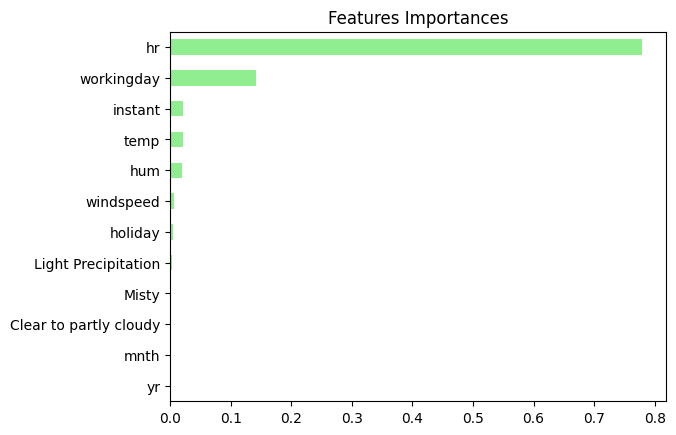

In [22]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

## AdaBoost  
Boosting refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor.  
* **Boosting**: Ensemble method combining several weak learners from a strong learner
  - Train an ensemble of predictors sequentially
  - Each predictor tries to correct its predecessor 
  - Most popular boosting methods AdaBost, GradientBoosting
* **Weak learner**: Model doing slightly better than random guessing. 


**Adaboost** 
* Stands for adaptive boosting
* Each predictor pays more attention to the instances wrongly predicted by its predecessor
* Achieved by changing the weights of training instances
* Each predictor is assigned a coefficient $\alpha$ which depends on the predictor's training error.
* Classification: Weighted majority voting. In sklearn: AdaBoostClassifier. 
* Regression: Weighted average. In sklearn: AdaBostRegressor.   
  
from sklearn.ensemble import AdaBoostClassifier   
from sklearn.metric import roc_auc_score  
...  
dt=DecisionTreeClassifier(max_depth=1, random_state=1)  
adb_clf=AdaBoostClassifier(base_estimator=dt, n_estimators=100)  
y_pred_proba=adb_clf.predict_proba(X_test)[:,1]  
adb_clf_roc_auc_score= roc_auc_score(y_test,y_pred_proba)  





Define the AdaBoost classifier

Revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

In [4]:
from sklearn.model_selection import train_test_split
X=indian.drop(["Unnamed: 0","Liver_disease"],axis=1).values
y=indian.Liver_disease.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [2]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [5]:
# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [6]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.77


## Gradient boosting  (GB)  
* Sequential correction of predecessor's errors  
* Does not tweak the weights of training instances
* Fit each predictor is training using its predecessor's residual errors as labels
* Gradient Boosted Trees: a CART is used as a base learner.
* Regression: In sklearn GradientBoostingRegressor
* Calssification: In sklearn GradientBoostingClassifier
  
  
from sklearn.ensemble import GradientBoostinRegressor  
...  
gbt=GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=1)  
gbt.fit(X_train,y_train)  
... 

Define the GB regressor

Revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

In [7]:
X=bikes.drop("cnt",axis=1).values
y=bikes.cnt.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20)

In [9]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

Evaluate the GB regressor

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb. 

In [10]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_pred,y_test)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 56.018


## Stochastic Gradient Boosting (SGB)  
* Each tree is trained on a random subset of rows of the training data
* The sampled instances (40%-80% of the training set) are sampled without replacement  
* Features are sample without replacement when choosing split points
* Result: further ensemble diversity
* Effect: adding further variance to the ensemble of trees

In sklearn, we use the argument subsample:     sgbt=GradientBoostingRegressor(max_depth=1, max_features=0.2, subsample=0.8,...)  

Regression with SGB

Again with Bike Sharing Demand dataset to compare. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

In [12]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [13]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 58.601


## Model tuning  
**Tuning a CARTs hyperparameters**  
Recall that in a machine learning model:  
* Parameters are learned from data  
* Hyperparameters are not learned from data, set prior training. CART example: max_depth. min_samples_leaf,...    

Hyperparameter tuning: Search for a set of optimal hyperparameters for a learning algorithm which results in an optimal model. Optimal model yields an optimal score.   
  
* Cross validation  is used to estimate the generalization performance.

**Approaches for hyperparameter tunnig**  
* Grid search 
* Random Search
* Bayesian Optimization
* Genetic Algorithms
* ... so on.  

**Grid search for cross validation**  
* Manually set a grid of discrete hyperparameter values
* Set a metric for scorin a model performance
* Search exhaustiv through the grid
* For each set of hyperparameters, evaluate each model's CV score
* The optimal hyperparameters are those of the model achieving best CV score  

In sklearn:  
from sklearn.model_selection import GridSearchCV  
params_dt={}  
grid_dt=GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1)  
grid_dt.fit(X_train,y_train)  
best_hyperparms=grid_dt.best_params  
%Extract best CV score  
best_CV_score=grid_dt.best_score_  
%Extract best model  
best_model=grid_dt.best_estimator_  
test_acc=best_model.score(X_test,y_test)

In [7]:
from sklearn.model_selection import train_test_split
X=indian.drop(["Unnamed: 0","Liver_disease"],axis=1).values
y=indian.Liver_disease.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y)

Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

In [5]:
# Define params_dt
params_dt = {'max_depth':[2,3,4],'min_samples_leaf':[0.12,0.14,0.16,0.18]}
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

In [8]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [9]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.680


### Tuning Random Forest's parameters  
* CART hyperparameters
* number of estimators
* bootstrap  

Hyperparameter tuning:  
* computationally expensive,
* sometimes leads to very slight improvement  
Weight the impact of tuning on the whole project

**Inspecting a RF Hyperparameters in sklearn** 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_square_error as MSE
from sklearn.model_selection import GridSearchCV    
rf=RandomForestRegressor(random_state=1)   
fr.get_params()    
params_rf={}  
grid_rf=GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

Random forests hyperparameters

Revisiting the Bike Sharing Demand dataset. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor

In [12]:
# Define the dictionary 'params_rf'
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1, random_state=2)
params_rf = {'n_estimators':[100,350,500],'max_features':['log2','auto','sqrt'],'min_samples_leaf':[2,10,30]}

In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=2),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [21]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_pred,y_test)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 0.426
